In [202]:
pip install alpaca

In [203]:
pip install load_dotenv

In [204]:
# Install the alpaca_trade_api module
!pip install alpaca-trade-api

# Import the module after installation
import alpaca_trade_api as tradeapi

In [205]:
pip install hvplot

In [206]:
pip install ta

In [207]:
# Initial imports
import os
import requests
import pandas as pd
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import hvplot.pandas
%matplotlib inline
import ta
from textblob import TextBlob
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report

In [208]:
# Load .env enviroment variables
load_dotenv()

False

In [209]:
ALPACA_API_KEY="PK7KB4YV1VVIZXY3KR7K"
ALPACA_SECRET_KEY="zdgytHlXTB3eR8hRW6pJk3LIZ1ER6EnzJDyLlqzg"

In [210]:
# Set Alpaca API key and secret
#alpaca_api_key=os.getenv('ALPACA_API_KEY')
#alpaca_secret_key=os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca=tradeapi.REST(
    ALPACA_API_KEY,
    ALPACA_SECRET_KEY,
    api_version='v2'
)

In [211]:
# Format current date as ISO format
start_time=pd.Timestamp('2017-01-01', tz='America/New_York').isoformat()
end_time=pd.Timestamp('2023-12-01', tz='America/New_York').isoformat()

# Set the tickers
tickers = ["GOOGL"]
# Set timeframe to "1Minute" for Alpaca API
timeframe = "1Day"


In [212]:
### Creating Alpaca Dataframe
df_tickers=alpaca.get_bars(
        tickers,
        timeframe,
        start=start_time,
        end=end_time
    ).df
df_tickers

,close,high,low,trade_count,open,volume,vwap,symbol
timestamp,,,,,,,,
2017-01-03 05:00:00+00:00,808.01,811.435,796.8900,33117,800.62,2117809,806.281631,GOOGL
2017-01-04 05:00:00+00:00,807.77,813.430,804.1100,26004,809.89,1651300,807.758359,GOOGL
2017-01-05 05:00:00+00:00,813.02,813.740,805.9200,22881,807.50,1415963,811.693859,GOOGL
2017-01-06 05:00:00+00:00,825.21,828.960,811.5000,33738,814.99,2145057,823.721693,GOOGL
2017-01-09 05:00:00+00:00,827.18,830.430,821.6200,24646,826.11,1544704,827.116962,GOOGL
...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,136.41,138.420,136.0000,248855,136.03,23439152,136.740726,GOOGL
2023-11-28 05:00:00+00:00,137.20,137.250,135.4222,206263,136.08,18733923,136.612461,GOOGL
2023-11-29 05:00:00+00:00,134.99,138.288,134.8400,284255,137.57,23970928,135.811616,GOOGL


In [213]:
# Fund and Shares & investement
fund=125.07
shares=float(fund)/df_tickers['close'].iloc[0]
df_tickers["invest"]=df_tickers["close"] * shares
print(f"Your Apple Shares are {round(shares,0)}")

Your Apple Shares are 0.0


In [214]:
### Defining function to calculate MACD and Signal Line
def calculate_macd(df_tickers = df_tickers, short_window=12, long_window=26):
        df_tickers['ShortEMA'] = df_tickers['close'].ewm(span=short_window, adjust=False).mean()
        df_tickers['LongEMA'] = df_tickers['close'].ewm(span=long_window, adjust=False).mean()
        df_tickers['MACD'] = df_tickers['ShortEMA'] - df_tickers['LongEMA']
        df_tickers['SignalLine'] = df_tickers['MACD'].ewm(span=9, adjust=False).mean()
        df_tickers['histogram'] = df_tickers['MACD'] - df_tickers['SignalLine']
        return df_tickers

In [215]:
### Calculating the MACD Line
calculate_macd(df_tickers)

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,LongEMA,MACD,SignalLine,histogram
timestamp,,,,,,,,,,,,,,
2017-01-03 05:00:00+00:00,808.01,811.435,796.8900,33117,800.62,2117809,806.281631,GOOGL,125.070000,808.010000,808.010000,0.000000,0.000000,0.000000
2017-01-04 05:00:00+00:00,807.77,813.430,804.1100,26004,809.89,1651300,807.758359,GOOGL,125.032851,807.973077,807.992222,-0.019145,-0.003829,-0.015316
2017-01-05 05:00:00+00:00,813.02,813.740,805.9200,22881,807.50,1415963,811.693859,GOOGL,125.845486,808.749527,808.364650,0.384876,0.073912,0.310964
2017-01-06 05:00:00+00:00,825.21,828.960,811.5000,33738,814.99,2145057,823.721693,GOOGL,127.732348,811.281907,809.612454,1.669453,0.393020,1.276433
2017-01-09 05:00:00+00:00,827.18,830.430,821.6200,24646,826.11,1544704,827.116962,GOOGL,128.037280,813.727768,810.913754,2.814014,0.877219,1.936795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,136.41,138.420,136.0000,248855,136.03,23439152,136.740726,GOOGL,21.114589,135.171085,133.830306,1.340779,0.639708,0.701072
2023-11-28 05:00:00+00:00,137.20,137.250,135.4222,206263,136.08,18733923,136.612461,GOOGL,21.236871,135.483226,134.079913,1.403313,0.792429,0.610884
2023-11-29 05:00:00+00:00,134.99,138.288,134.8400,284255,137.57,23970928,135.811616,GOOGL,20.894790,135.407345,134.147327,1.260018,0.885947,0.374072


In [216]:
# Calculate the MACD and signal line using talib
#macd= ta.trend.MACD(data['Close']).macd()
#signal= ta.trend.MACD(data['Close']).macd_signal()

# Calculate the RSI using talib
rsi = ta.momentum.RSIIndicator(df_tickers['close']).rsi()

# Calculate the ADX using talib
adx = ta.trend.adx(df_tickers['high'], df_tickers['low'], df_tickers['close'])

# Perform sentiment analysis using TextBlob
#sentiment = []
#for date in df_tickers.index:
#    sentiment.append(TextBlob(str(df_tickers.loc[date, 'close'])).sentiment.polarity)

#Moving averages short and long
df_tickers['ma 50']= df_tickers['close'].rolling(window=50).mean()
df_tickers['ma 200']=df_tickers['close'].rolling(window=200).mean()

# Volume related indicator
df_tickers['volume sma']=df_tickers['volume'].rolling(window=20).mean()

# Support and resistance levels
df_tickers['support level']=df_tickers['low'].rolling(window=50).min()
df_tickers['resistance level']=df_tickers['high'].rolling(window=50).max()

# add other ta indicators using ta library
#df_tickers=add_all_ta_features(df_tickers,'open','high','low','close','volume')

# Create a DataFrame to store the signals
#signals = pd.DataFrame(index=df_tickers.index)
#signals['MACD'] = macd
#signals['Signal'] = signal

df_tickers['rsi'] = rsi
df_tickers['adx'] = adx
#df_tickers['sentiment'] = sentiment

# Set the short window and long window
short_window_sma = 4
long_window_sma = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
df_tickers['SMA_Fast'] = df_tickers['close'].rolling(window=short_window_sma).mean()
df_tickers['SMA_Slow'] = df_tickers['close'].rolling(window=long_window_sma).mean()

# Aweseome Oscillator
#awesome_oscillator = ta.momentum.AwesomeOscillator(high=df_tickers['high'], low=df_tickers['low'], window1=5, window2=34)
#df_tickers['Awesome_Oscillator'] = awesome_oscillator.awesome_oscillator()
df_tickers['Median_Price'] = (df_tickers['high'] + df_tickers['low']) / 2
df_tickers['SMA5'] = df_tickers['Median_Price'].rolling(window=5).mean()
df_tickers['SMA34'] = df_tickers['Median_Price'].rolling(window=34).mean()
df_tickers['Awesome_Oscillator'] = df_tickers['SMA5'] - df_tickers['SMA34']



# Chaikin Money Flow Indicator
#df_tickers['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(high=df_tickers['high'], low=df_tickers['low'], Close=df_tickers['close'], volume=df_tickers['volume'], window=20)
cmf_indicator = ta.volume.ChaikinMoneyFlowIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], volume=df_tickers['volume'], window=20)
df_tickers['Chaikin_Money_Flow'] = cmf_indicator.chaikin_money_flow()

#ATR (Average True Range)
atr = ta.volatility.AverageTrueRange(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], window=14)
df_tickers['ATR'] = atr.average_true_range()

# Bollinger Bands
bollinger_bands= ta.volatility.BollingerBands(close=df_tickers['close'], window=20, window_dev=2)
df_tickers['BB_Middle'] = bollinger_bands.bollinger_mavg()  # Middle band (SMA)
df_tickers['BB_Upper'] = bollinger_bands.bollinger_hband()  # Upper band
df_tickers['BB_Lower'] = bollinger_bands.bollinger_lband()  # Lower band

# Stochastic Oscillator
stochastic_oscillator = ta.momentum.StochasticOscillator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], window=14, smooth_window=3)
df_tickers['%K'] = stochastic_oscillator.stoch()
df_tickers['%D'] = stochastic_oscillator.stoch_signal()

# CCI (Commodity Channel Index)
cci_indicator = ta.trend.CCIIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], window=20)
df_tickers['CCI'] = cci_indicator.cci()

# Parabolic SAR (Stop and Reverse)
psar_indicator = ta.trend.PSARIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'])
df_tickers['PSAR'] = psar_indicator.psar()

#Ichimoku Cloud
conversion_line_period = 9
base_line_period = 26
lagging_span_period = 52
conversion_line = (df_tickers['high'].rolling(window=conversion_line_period).max() + df_tickers['low'].rolling(window=conversion_line_period).min()) / 2
base_line = (df_tickers['high'].rolling(window=base_line_period).max() + df_tickers['low'].rolling(window=base_line_period).min()) / 2
leading_span_a = (conversion_line + base_line) / 2
leading_span_b = (df_tickers['high'].rolling(window=lagging_span_period).max() + df_tickers['low'].rolling(window=lagging_span_period).min()) / 2
lagging_span = df_tickers['close'].shift(-lagging_span_period)

df_tickers['Ichimoku_Conversion_Line'] = conversion_line
df_tickers['Ichimoku_Base_Line'] = base_line
df_tickers['Ichimoku_Leading_Span_A'] = leading_span_a
df_tickers['Ichimoku_Leading_Span_B'] = leading_span_b
df_tickers['Ichimoku_Lagging_Span'] = lagging_span

# Williams %R
#williams_r_indicator = ta.momentum.WilliamsR(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], lbp=14)
#df_tickers['Williams_%R'] = williams_r_indicator.williams_r()

williams_r_indicator = ta.momentum.WilliamsRIndicator(high=df_tickers['high'], low=df_tickers['low'], close=df_tickers['close'], lbp=14)
df_tickers['Williams_%R'] = williams_r_indicator.williams_r()

# Volume Weighted Average Price (VWAP)
obv_indicator = ta.volume.OnBalanceVolumeIndicator(close=df_tickers['close'], volume=df_tickers['volume'])
df_tickers['On_Balance_Volume'] = obv_indicator.on_balance_volume()


# On-Balance Volume (OBV)
df_tickers['OBV'] = (df_tickers['close'].pct_change().fillna(0) > 0).astype(int)
df_tickers['OBV'] = (df_tickers['OBV'] * 2 - 1) * df_tickers['volume']
df_tickers['OBV'] = df_tickers['OBV'].cumsum()

# Relative Vigor Index (RVI)
df_tickers['Typical_Price'] = (df_tickers['high'] + df_tickers['low'] + 2 * df_tickers['close']) / 4
df_tickers['Closing_Price_Change'] = df_tickers['close'].diff()
df_tickers['RVI'] = df_tickers['Typical_Price'].rolling(window=14).sum() / df_tickers['Closing_Price_Change'].abs().rolling(window=14).sum()

#Aroon Indicator
aroon_indicator = ta.trend.AroonIndicator(high=df_tickers['high'], low=df_tickers['low'], window=14)
df_tickers['Aroon_Up'] = aroon_indicator.aroon_up()
df_tickers['Aroon_Down'] = aroon_indicator.aroon_down()
df_tickers['Aroon_Oscillator'] = aroon_indicator.aroon_indicator()

#Chaikin Oscillator
df_tickers['ADL'] = ((df_tickers['close'] - df_tickers['low']) - (df_tickers['high'] - df_tickers['close'])) / (df_tickers['high'] - df_tickers['low']) * df_tickers['volume']
df_tickers['ADL'] = df_tickers['ADL'].cumsum()
df_tickers['EMA3'] = df_tickers['ADL'].ewm(span=3, adjust=False).mean()
df_tickers['EMA10'] = df_tickers['ADL'].ewm(span=10, adjust=False).mean()
df_tickers['Chaikin_Oscillator'] = df_tickers['EMA3'] - df_tickers['EMA10']



In [217]:
df_tickers.head()

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,...,Typical_Price,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 05:00:00+00:00,808.01,811.435,796.89,33117,800.62,2117809,806.281631,GOOGL,125.070000,808.010000,...,806.08625,NaN,NaN,NaN,NaN,NaN,1.120422e+06,1.120422e+06,1.120422e+06,0.000000
2017-01-04 05:00:00+00:00,807.77,813.430,804.11,26004,809.89,1651300,807.758359,GOOGL,125.032851,807.973077,...,808.27000,-0.24,NaN,NaN,NaN,NaN,7.660659e+05,9.432440e+05,1.055994e+06,-112749.707374
2017-01-05 05:00:00+00:00,813.02,813.740,805.92,22881,807.50,1415963,811.693859,GOOGL,125.845486,808.749527,...,811.42500,5.25,NaN,NaN,NaN,NaN,1.921289e+06,1.432266e+06,1.213320e+06,218946.343535
2017-01-06 05:00:00+00:00,825.21,828.960,811.50,33738,814.99,2145057,823.721693,GOOGL,127.732348,811.281907,...,822.72000,12.19,NaN,NaN,NaN,NaN,3.144930e+06,2.288598e+06,1.564522e+06,724076.212231
2017-01-09 05:00:00+00:00,827.18,830.430,821.62,24646,826.11,1544704,827.116962,GOOGL,128.037280,813.727768,...,826.60250,1.97,NaN,NaN,NaN,NaN,3.549954e+06,2.919276e+06,1.925510e+06,993766.585306


In [218]:
column_names = df_tickers.columns.tolist()
print(column_names)

['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'symbol', 'invest', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'Chaikin_Money_Flow', 'ATR', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator']


In [219]:
# df_tickers['algo_strategy_signal'] = pd.NA
# position = None
# buy_price = 0
# invest_buy_price = 0
# total_buy_amount = 0
# total_invest_buy_amount = 0
# total_sell_amount = 0
# total_invest_sell_amount = 0
# signals = []
# for i in range(1, len(df_tickers)):
#     if df_tickers['MACD'][i] > df_tickers['SignalLine'][i] and df_tickers['MACD'][i - 1] <= df_tickers['SignalLine'][i - 1]:
#         for a in df_tickers['adx']:
#             if a > 20:
#                 position = 'buy'
#                 buy_price = df_tickers['close'][i]
#                 invest_buy_price = df_tickers['invest'][i]
#                 total_buy_amount += buy_price
#                 total_invest_buy_amount += invest_buy_price
#                 signals.append((df_tickers.index[i], 'Buy', buy_price))
#                 df_tickers.at[i, 'algo_strategy_signal'] = -1
#     elif df_tickers['MACD'][i] < df_tickers['SignalLine'][i] and df_tickers['MACD'][i - 1] >= df_tickers['SignalLine'][i - 1]:
#         for a in df_tickers['adx']:
#             if a > 20:
#                 position = 'sell'
#                 sell_price = df_tickers['close'][i]
#                 invest_sell_price = df_tickers['invest'][i]
#                 total_sell_amount += sell_price
#                 total_invest_sell_amount += invest_sell_price
#                 signals.append((df_tickers.index[i], 'Sell', sell_price))
#                 df_tickers.at[i, 'algo_strategy_signal'] = 1
# profit = total_sell_amount - total_buy_amount
# invest_profit = total_invest_sell_amount - total_invest_buy_amount
# df_tickers['trade price'] = df_tickers['close'] * df_tickers['algo_strategy_signal']
# df_tickers['invest trade price'] = df_tickers['invest'] * df_tickers['algo_strategy_signal']
# df_tickers['balance'] = df_tickers['trade price'].cumsum()
# df_tickers['invest balance'] = df_tickers['invest trade price'].cumsum()






# #Here are the changes made:
# #Used at method to set values in the DataFrame for better performance.
# #Removed unnecessary loops over 'adx' values.
# #Corrected the calculation of the 'balance' and 'invest balance' columns to use cumulative sum (cumsum).

In [220]:
### Using a loop to Calculate buy and sell signals based on MACD Line indicator and defining the total cashflow for that period. This shows if we made a profit or not
data_frame = df_tickers.copy()
position = None
buy_price = 0
invest_buy_price=0
total_buy_amount = 0
total_invest_buy_amount=0
total_sell_amount = 0
total_invest_sell_amount=0
sell_price = 0
invest_sell_price=0
signals = []
data_frame['algo signal']=pd.NA
for i in range(1, len(data_frame)):
        if (data_frame['MACD'][i] > data_frame['SignalLine'][i] and data_frame['MACD'][i - 1] <= data_frame['SignalLine'][i - 1]):
                for a in data_frame['adx']:
                 if a > 20:
                  position = 'buy'
                  buy_price = data_frame['close'][i]
                  invest_buy_price=data_frame['invest'][i]
                  total_buy_amount += buy_price
                  total_invest_buy_amount += invest_buy_price
                  signals.append((data_frame.index[i], 'Buy', buy_price))
                  data_frame['algo signal'][i]=-1
        elif (data_frame['MACD'][i] < data_frame['SignalLine'][i] and data_frame['MACD'][i - 1] >= data_frame['SignalLine'][i - 1]):
                for a in data_frame['adx']:
                 if a > 20:
                  position = 'sell'
                  sell_price = data_frame['close'][i]
                  invest_sell_price=data_frame['invest'][i]
                  total_sell_amount += sell_price
                  total_invest_sell_amount +=invest_sell_price
                  signals.append((data_frame.index[i], 'Sell', sell_price))
                  data_frame['algo signal'][i]=1

profit = total_sell_amount - total_buy_amount
invest_profit=total_invest_sell_amount - total_invest_buy_amount

<ipython-input-220-6b2eab6ef8e4>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['algo signal'][i]=1
<ipython-input-220-6b2eab6ef8e4>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame['algo signal'][i]=-1


In [234]:
data_frame['trade price']=data_frame['close'].where(data_frame['algo signal'].isin([-1,1]))
data_frame['invest trade price']=data_frame['invest'].where(data_frame['algo signal'].isin([-1,1]))
data_frame['balance']=data_frame['trade price']*data_frame['algo signal']
data_frame['invest balance']=data_frame['invest trade price']*data_frame['algo signal']
#['cumsum balance'] = df_tickers['trade price'].cumsum()
#data_frame['cumsum invest balance'] = df_tickers['invest trade price'].cumsum()


In [235]:
#data_frame2=data_frame.dropna(subset=['balance'], how='all')

In [236]:
#data_frame2.tail(50)

In [237]:
#profit_test=data_frame2['balance'].sum()
#print(profit_test)

In [238]:
# #printing total buy and total sell
# print("Total Buy Amount:", total_buy_amount)
# print("Total Sell Amount:", total_sell_amount)
# print ("Profit:", (profit))
# print('-----------------------')
# print("Total Buy Amount:", total_invest_buy_amount)
# print("Total Sell Amount:", total_invest_sell_amount)
# print ("Invest Profit:", (invest_profit))

In [239]:
column_titles_list = data_frame.columns.tolist()
print(column_titles_list)

['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'symbol', 'invest', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'Chaikin_Money_Flow', 'ATR', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator', 'algo signal', 'trade price', 'invest trade price', 'balance', 'invest balance']


In [240]:
data_frame['buy']=data_frame['balance'].where(data_frame['balance']>0)
data_frame['sell']=data_frame['balance'].where(data_frame['balance']<0)
buy=data_frame['buy'].sum()
sell=data_frame['sell'].sum()
balance_profit=data_frame['balance'].sum()
print(f"total buy amount is ${buy}")
print(f"total sell amount is ${sell}")
print(f"Profit/Loss is ${balance_profit}")

total buy amount is $104258.89000000001
total sell amount is $-103213.83000000003
Profit/Loss is $1045.0599999999993


In [241]:
#Plot New Startegy close, macd buy, macd sell
# Visualize exit position relative to close price
exit = data_frame[data_frame['algo signal'] == 1.0]['close'].hvplot.scatter(
    color='yellow',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = data_frame[data_frame['algo signal'] == -1.0]['close'].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = data_frame[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
e_moving_avgs = data_frame[['MACD', 'SignalLine']].hvplot(
    ylabel='Price in $',
    width=1000,
    height=200
)

# Create the overlay plot
entry_exit_plot = security_close * entry * exit

# Show the plot with a title
display(e_moving_avgs)
display(entry_exit_plot.opts(
    title="Apple - MACD, Signal, Entry and Exit Points"
))


:NdOverlay   [Variable]
   :Curve   [timestamp]   (value)

:Overlay
   .Curve.I          :Curve   [timestamp]   (close)
   .Scatter.Close.I  :Scatter   [timestamp]   (close)
   .Scatter.Close.II :Scatter   [timestamp]   (close)

In [242]:
Close_plot = df_tickers['close'].hvplot.line(
    x='timestamp',
    y='close',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close',
    xlabel='timestamp',
    title='Closing Price AAPL',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

MACD_plot = df_tickers['MACD'].hvplot.line(
    x='timestamp',
    y='MACD',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close',
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
).opts(
    yformatter='%.2f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)
Signal_plot = df_tickers['SignalLine'].hvplot.line(
    x='timestamp',
    y='SignalLine',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='AAPL close',
    xlabel='timestamp',
    title='MACD Line & Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.2f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

Histogram_plot = df_tickers['histogram'].hvplot.bar(
    x='timestamp',
    y='histogram',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='MACD-Signal',
    xlabel='timestamp',
    title='MACD Line - Signal Line',
    grid=True,
    legend=True,
).opts(
    yformatter='%.2f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)



In [243]:
Close_plot

:Curve   [timestamp]   (close)

In [244]:
plot = MACD_plot * Signal_plot
plot

:Overlay
   .Curve.MACD       :Curve   [timestamp]   (MACD)
   .Curve.SignalLine :Curve   [timestamp]   (SignalLine)

In [245]:
Histogram_plot

:Bars   [timestamp]   (histogram)

In [246]:
# Use the pct_change function to generate returns from close prices
data_frame["Returns"] = data_frame["close"].pct_change()

In [247]:
# Initialize the new Signal column
data_frame['Daily Returns Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
data_frame.loc[(data_frame['Returns'] >= 0), 'Daily Returns Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
data_frame.loc[(data_frame['Returns'] < 0), 'Daily Returns Signal'] = -1

In [248]:
data_frame['Daily Returns Signal'].value_counts()

 1.0    931
-1.0    809
 0.0      1
Name: Daily Returns Signal, dtype: int64

In [249]:
# Calculate the strategy returns and add them to the signals_df DataFrame
data_frame['Daily Strategy Returns'] = data_frame['Returns'] * data_frame['Daily Returns Signal'].shift()

<Axes: xlabel='timestamp'>

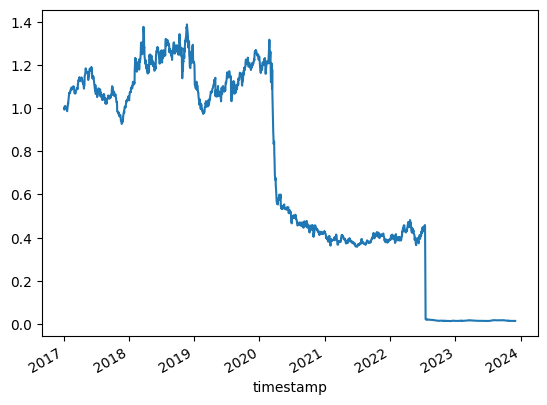

In [250]:
# Plot Strategy Returns to examine performance
(1 + data_frame['Daily Strategy Returns']).cumprod().plot()

In [251]:
data_frame.head()

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,...,algo signal,trade price,invest trade price,balance,invest balance,buy,sell,Returns,Daily Returns Signal,Daily Strategy Returns
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 05:00:00+00:00,808.01,811.435,796.89,33117,800.62,2117809,806.281631,GOOGL,125.070000,808.010000,...,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,NaN,0.0,NaN
2017-01-04 05:00:00+00:00,807.77,813.430,804.11,26004,809.89,1651300,807.758359,GOOGL,125.032851,807.973077,...,1,807.77,125.032851,807.77,125.032851,807.77,NaN,-0.000297,-1.0,-0.000000
2017-01-05 05:00:00+00:00,813.02,813.740,805.92,22881,807.50,1415963,811.693859,GOOGL,125.845486,808.749527,...,-1,813.02,125.845486,-813.02,-125.845486,NaN,-813.02,0.006499,1.0,-0.006499
2017-01-06 05:00:00+00:00,825.21,828.960,811.50,33738,814.99,2145057,823.721693,GOOGL,127.732348,811.281907,...,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,0.014993,1.0,0.014993
2017-01-09 05:00:00+00:00,827.18,830.430,821.62,24646,826.11,1544704,827.116962,GOOGL,128.037280,813.727768,...,<NA>,NaN,NaN,<NA>,<NA>,NaN,NaN,0.002387,1.0,0.002387


In [252]:
# Drop the rows where there is no balace in the balnce column
#data_frame2=data_frame.dropna(subset=['balance'], how='all')


In [253]:
# Sum balance of two consecutive trades of buy and sell
#data_frame2['profit/loss']=data_frame2['balance'].shift(1)+data_frame2['balance']
#data_frame2['profit/loss'].fillna(data_frame2['balance'], inplace=True)

In [254]:
# profit signa is assignes where profit is more than loss to 1
#data_frame2['profit signal']=np.where(data_frame2['profit/loss']>0, -1,1)


In [255]:
#data_frame2['buy/sell signal']=data_frame2['profit signal'].shift(1).fillna(0)*-1
#data_frame2.tail(50)

#data_frame2['buy/sell signal']=np.where(data_frame2['profit signal']==1, -1,1)


In [256]:
# Initialize the new Signal column
#data_frame2['Final Signal'] = 0.0
commision=0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
#data_frame2.loc[(data_frame2['profit/loss'] >= 0), 'Final Signal'] = -1

# When Actual Returns are less than 0, generate signal to sell stock short
#data_frame2.loc[(data_frame2['profit/loss'] < 0), 'Final Signal'] = 1

#Calculate new profits based on updated signals
data_frame['commission']=commision*data_frame['Daily Returns Signal'].where(data_frame['Daily Returns Signal']==-1)
data_frame['better balance']=data_frame['close']*data_frame['Daily Returns Signal']+data_frame['commission']
data_frame['better invest balance']=data_frame['invest']*data_frame['Daily Returns Signal']+data_frame['commission']
profit_daily_strategy_returns=data_frame['Daily Strategy Returns'].sum()-(data_frame['commission'].sum())

print(f"Daily Strategt Returns total profit is ${profit_daily_strategy_returns}")

Daily Strategt Returns total profit is $-1.921159646269789


In [257]:

profit2=data_frame['better balance'].sum()
print(f"1 share profit is ${profit2}")
print("---------------")
invest_profit2=data_frame['better invest balance'].sum()
print(f"multiple shares profit is ${invest_profit2}")

1 share profit is $-1001463.15
---------------
multiple shares profit is $-155014.16587727872


In [263]:
#useful_df=data_frame[['profit/loss','profit signal','Final Signal','better balance','better invest balance']].copy()
#useful_df.tail()

In [264]:
#final_data_frame=pd.concat([data_frame, useful_df], axis=1)
#final_data_frame.head()

In [265]:
data_frame.tail(50)

,close,high,low,trade_count,open,volume,vwap,symbol,invest,ShortEMA,...,balance,invest balance,buy,sell,Returns,Daily Returns Signal,Daily Strategy Returns,commission,better balance,better invest balance
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-09-22 04:00:00+00:00,130.250,132.0250,129.6000,258665,130.760,26397339,130.751800,GOOGL,20.161096,134.392809,...,<NA>,<NA>,NaN,NaN,-0.001457,-1.0,0.001457,-0.0,-130.250,-20.161096
2023-09-25 04:00:00+00:00,131.110,131.1700,128.9600,248301,129.830,20096978,130.468000,GOOGL,20.294214,133.887762,...,<NA>,<NA>,NaN,NaN,0.006603,1.0,-0.006603,NaN,NaN,NaN
2023-09-26 04:00:00+00:00,128.565,130.3645,127.2200,311552,129.770,25721806,128.323549,GOOGL,19.900279,133.068875,...,<NA>,<NA>,NaN,NaN,-0.019411,-1.0,-0.019411,-0.0,-128.565,-19.900279
2023-09-27 04:00:00+00:00,130.540,130.8950,128.5700,266738,128.570,22752667,129.842027,GOOGL,20.205985,132.679818,...,<NA>,<NA>,NaN,NaN,0.015362,1.0,-0.015362,NaN,NaN,NaN
2023-09-28 04:00:00+00:00,132.310,133.3000,129.7900,267240,129.840,22516661,131.921307,GOOGL,20.479959,132.622923,...,<NA>,<NA>,NaN,NaN,0.013559,1.0,0.013559,NaN,NaN,NaN
2023-09-29 04:00:00+00:00,130.860,134.0500,130.3600,302954,133.280,30866615,131.669667,GOOGL,20.255517,132.351704,...,<NA>,<NA>,NaN,NaN,-0.010959,-1.0,-0.010959,-0.0,-130.860,-20.255517
2023-10-02 04:00:00+00:00,134.170,134.4200,131.1700,281721,131.210,22292212,133.353030,GOOGL,20.767864,132.631442,...,<NA>,<NA>,NaN,NaN,0.025294,1.0,-0.025294,NaN,NaN,NaN
2023-10-03 04:00:00+00:00,132.430,134.2600,131.8400,263663,133.940,22995041,132.684876,GOOGL,20.498534,132.600451,...,<NA>,<NA>,NaN,NaN,-0.012969,-1.0,-0.012969,-0.0,-132.430,-20.498534
2023-10-04 04:00:00+00:00,135.240,135.5700,132.5300,302675,132.790,26759590,134.600189,GOOGL,20.933487,133.006535,...,<NA>,<NA>,NaN,NaN,0.021219,1.0,-0.021219,NaN,NaN,NaN


In [266]:
#Plot New Startegy close, macd buy, macd sell
# Visualize exit position relative to close price
exit = data_frame[data_frame['Daily Returns Signal'] == -1.0]['close'].hvplot.scatter(
    color='yellow',
    marker='v',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize entry position relative to close price
entry = data_frame[data_frame['Daily Returns Signal'] == 1.0]['close'].hvplot.scatter(
    color='purple',
    marker='^',
    size=200,
    legend=False,
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize close price for the investment
security_close = data_frame[['close']].hvplot(
    line_color='lightgray',
    ylabel='Price in $',
    width=1000,
    height=400
)

# Visualize moving averages
#e_moving_avgs = data_frame[['MACD', 'SignalLine']].hvplot(
#    ylabel='Price in $',
#    width=1000,
#    height=200
#)

# Create the overlay plot
entry_exit_plot = security_close * entry * exit

# Show the plot with a title
#display(e_moving_avgs)
display(entry_exit_plot.opts(
    title="Apple - MACD, Signal, Entry and Exit Points"
))


:Overlay
   .Curve.I          :Curve   [timestamp]   (close)
   .Scatter.Close.I  :Scatter   [timestamp]   (close)
   .Scatter.Close.II :Scatter   [timestamp]   (close)

In [267]:
# Get current closing prices for AAPL and SP500
df_spy=alpaca.get_bars(
    tickers,
    timeframe,
    start=start_time,
    end=end_time
).df


In [268]:

df_spy.drop(['high','low','trade_count','open','volume','vwap','symbol'], axis=1, inplace=True)



In [277]:
# Fund and Shares & investement
fund=500
shares=float(fund)/df_spy['close'].iloc[0]
df_spy["shares investement"]=df_tickers["close"] * shares
print(f"Your Apple Shares are {round(shares,0)}")

Your Apple Shares are 1.0


In [278]:
# Returns
df_spy['return']=df_spy['close'].pct_change()
df_spy['shares investement return']=df_spy['shares investement'].pct_change()


In [279]:
# Cumulative returns
df_spy['cumprod']=(1+df_spy['return']).cumprod()
df_spy['shares investement cumprod']=(1+df_spy['shares investement return']).cumprod()


In [280]:
df_spy['invest']=df_spy['cumprod']*float(fund)
df_spy['shares final invest']=df_spy['shares investement cumprod']*float(fund)
display(df_spy)

,close,shares investement,return,shares investement return,cumprod,shares investement cumprod,invest,shares final invest
timestamp,,,,,,,,
2017-01-03 05:00:00+00:00,808.01,500.000000,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04 05:00:00+00:00,807.77,499.851487,-0.000297,-0.000297,0.999703,0.999703,499.851487,499.851487
2017-01-05 05:00:00+00:00,813.02,503.100209,0.006499,0.006499,1.006200,1.006200,503.100209,503.100209
2017-01-06 05:00:00+00:00,825.21,510.643433,0.014993,0.014993,1.021287,1.021287,510.643433,510.643433
2017-01-09 05:00:00+00:00,827.18,511.862477,0.002387,0.002387,1.023725,1.023725,511.862477,511.862477
...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,136.41,84.411084,-0.002048,-0.002048,0.168822,0.168822,84.411084,84.411084
2023-11-28 05:00:00+00:00,137.20,84.899939,0.005791,0.005791,0.169800,0.169800,84.899939,84.899939
2023-11-29 05:00:00+00:00,134.99,83.532382,-0.016108,-0.016108,0.167065,0.167065,83.532382,83.532382


In [281]:
spy_plot = df_spy['invest'].hvplot.line(
    x='timestamp',
    y='invest',
    rot=90,
    frame_width=1000,
    frame_height=500,
    ylabel='Cumulative Returns',
    xlabel='timestamp',
    title='SPY Cumulative returns',
    grid=True,
).opts(
    yformatter='%.0f',
    hover_color="orange",
    gridstyle={'color': 'gray', 'line_width': 1, 'line_style': 'solid'}
)

spy_plot

:Curve   [timestamp]   (invest)

In [282]:
spy_return=df_spy.iloc[-1,-1] - df_spy.iloc[1,-1]
print(f"You made a profit of your SPY investement of $ {round(spy_return,2)}")

You made a profit of your SPY investement of $ -418.26


In [283]:
final_df=pd.DataFrame({"MACD / Long": [balance_profit], "SPY":[spy_return]})
final_df.head()

,MACD / Long,SPY
0,1045.06,-418.255962


<Axes: title={'center': 'MACD long vs SPY Investement'}>

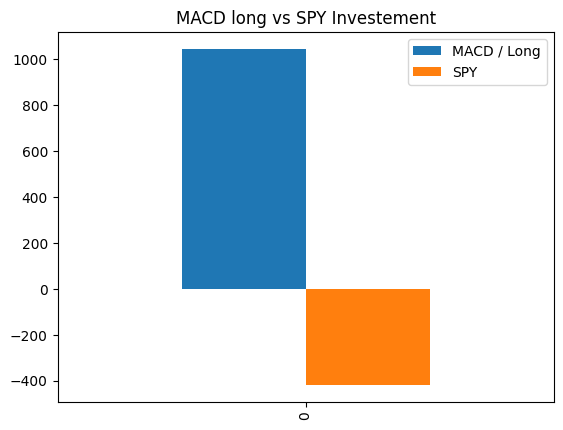

In [284]:
final_df.plot(kind ='bar', title='MACD long vs SPY Investement')

In [285]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [286]:
# Review the data types associated with the columns
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1741 entries, 2017-01-03 05:00:00+00:00 to 2023-12-01 05:00:00+00:00
Data columns (total 67 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   close                     1741 non-null   float64
 1   high                      1741 non-null   float64
 2   low                       1741 non-null   float64
 3   trade_count               1741 non-null   int64  
 4   open                      1741 non-null   float64
 5   volume                    1741 non-null   int64  
 6   vwap                      1741 non-null   float64
 7   symbol                    1741 non-null   object 
 8   invest                    1741 non-null   float64
 9   ShortEMA                  1741 non-null   float64
 10  LongEMA                   1741 non-null   float64
 11  MACD                      1741 non-null   float64
 12  SignalLine                1741 non-null   float64
 13  histogram      

In [287]:
data_frame_neural=data_frame[['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'Chaikin_Money_Flow', 'ATR', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator','algo signal']]

In [288]:
data_frame_neural.head()

,close,high,low,trade_count,open,volume,vwap,ShortEMA,LongEMA,MACD,...,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator,algo signal
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 05:00:00+00:00,808.01,811.435,796.89,33117,800.62,2117809,806.281631,808.010000,808.010000,0.000000,...,NaN,NaN,NaN,NaN,NaN,1.120422e+06,1.120422e+06,1.120422e+06,0.000000,<NA>
2017-01-04 05:00:00+00:00,807.77,813.430,804.11,26004,809.89,1651300,807.758359,807.973077,807.992222,-0.019145,...,-0.24,NaN,NaN,NaN,NaN,7.660659e+05,9.432440e+05,1.055994e+06,-112749.707374,1
2017-01-05 05:00:00+00:00,813.02,813.740,805.92,22881,807.50,1415963,811.693859,808.749527,808.364650,0.384876,...,5.25,NaN,NaN,NaN,NaN,1.921289e+06,1.432266e+06,1.213320e+06,218946.343535,-1
2017-01-06 05:00:00+00:00,825.21,828.960,811.50,33738,814.99,2145057,823.721693,811.281907,809.612454,1.669453,...,12.19,NaN,NaN,NaN,NaN,3.144930e+06,2.288598e+06,1.564522e+06,724076.212231,<NA>
2017-01-09 05:00:00+00:00,827.18,830.430,821.62,24646,826.11,1544704,827.116962,813.727768,810.913754,2.814014,...,1.97,NaN,NaN,NaN,NaN,3.549954e+06,2.919276e+06,1.925510e+06,993766.585306,<NA>


In [289]:
data_frame_neural.fillna(0, inplace=True)

<ipython-input-289-1e85857a162c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_frame_neural.fillna(0, inplace=True)


In [449]:
# Create a list of categorical variables
#categorical_variables = data_frame_neural.select_dtypes(include=['object','category']).columns.tolist()

# Display the categorical variables list
#print(categorical_variables)

In [450]:
# Create a OneHotEncoder instance
#enc = OneHotEncoder(sparse=False)

In [451]:
# Encode the categorcal variables using OneHotEncoder
#encoded_data = enc.fit_transform(data_frame_neural[categorical_variables])

In [452]:
# Create a DataFrame with the encoded variables
#encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(categorical_variables))

# Review the DataFrame
#encoded_df

In [453]:
# Numerical variables
#numerical_variables_df = data_frame_neural.drop(columns = categorical_variables)

# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame
#encoded_df = pd.concat([numerical_variables_df, encoded_df], axis=1)

# Review the DataFrame
data_frame_neural

,close,high,low,trade_count,open,volume,vwap,ShortEMA,LongEMA,MACD,...,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator,algo signal
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-03 05:00:00+00:00,808.01,811.435,796.8900,33117,800.62,2117809,806.281631,808.010000,808.010000,0.000000,...,0.00,0.000000,0.000000,0.000000,0.000000,1.120422e+06,1.120422e+06,1.120422e+06,0.000000e+00,0
2017-01-04 05:00:00+00:00,807.77,813.430,804.1100,26004,809.89,1651300,807.758359,807.973077,807.992222,-0.019145,...,-0.24,0.000000,0.000000,0.000000,0.000000,7.660659e+05,9.432440e+05,1.055994e+06,-1.127497e+05,1
2017-01-05 05:00:00+00:00,813.02,813.740,805.9200,22881,807.50,1415963,811.693859,808.749527,808.364650,0.384876,...,5.25,0.000000,0.000000,0.000000,0.000000,1.921289e+06,1.432266e+06,1.213320e+06,2.189463e+05,-1
2017-01-06 05:00:00+00:00,825.21,828.960,811.5000,33738,814.99,2145057,823.721693,811.281907,809.612454,1.669453,...,12.19,0.000000,0.000000,0.000000,0.000000,3.144930e+06,2.288598e+06,1.564522e+06,7.240762e+05,0
2017-01-09 05:00:00+00:00,827.18,830.430,821.6200,24646,826.11,1544704,827.116962,813.727768,810.913754,2.814014,...,1.97,0.000000,0.000000,0.000000,0.000000,3.549954e+06,2.919276e+06,1.925510e+06,9.937666e+05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,136.41,138.420,136.0000,248855,136.03,23439152,136.740726,135.171085,133.830306,1.340779,...,-0.28,105.957276,85.714286,0.000000,85.714286,4.116718e+08,4.184333e+08,4.009936e+08,1.743976e+07,0
2023-11-28 05:00:00+00:00,137.20,137.250,135.4222,206263,136.08,18733923,136.612461,135.483226,134.079913,1.403313,...,0.79,105.868580,78.571429,21.428571,57.142857,4.293808e+08,4.239071e+08,4.061549e+08,1.775217e+07,0
2023-11-29 05:00:00+00:00,134.99,138.288,134.8400,284255,137.57,23970928,135.811616,135.407345,134.147327,1.260018,...,-2.21,98.682643,71.428571,14.285714,57.142857,4.074955e+08,4.157013e+08,4.063986e+08,9.302640e+06,0


In [454]:
X = data_frame_neural[['close', 'high', 'low', 'trade_count', 'open', 'volume', 'vwap', 'ShortEMA', 'LongEMA', 'MACD', 'SignalLine', 'histogram', 'ma 50', 'ma 200', 'volume sma', 'support level', 'resistance level', 'rsi', 'adx', 'SMA_Fast', 'SMA_Slow', 'Median_Price', 'SMA5', 'SMA34', 'Awesome_Oscillator', 'BB_Middle', 'BB_Upper', 'BB_Lower', '%K', '%D', 'Chaikin_Money_Flow', 'ATR', 'CCI', 'PSAR', 'Ichimoku_Conversion_Line', 'Ichimoku_Base_Line', 'Ichimoku_Leading_Span_A', 'Ichimoku_Leading_Span_B', 'Ichimoku_Lagging_Span', 'Williams_%R', 'On_Balance_Volume', 'OBV', 'Typical_Price', 'Closing_Price_Change', 'RVI', 'Aroon_Up', 'Aroon_Down', 'Aroon_Oscillator', 'ADL', 'EMA3', 'EMA10', 'Chaikin_Oscillator']].shift().dropna()
X

,close,high,low,trade_count,open,volume,vwap,ShortEMA,LongEMA,MACD,...,Typical_Price,Closing_Price_Change,RVI,Aroon_Up,Aroon_Down,Aroon_Oscillator,ADL,EMA3,EMA10,Chaikin_Oscillator
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-01-04 05:00:00+00:00,808.01,811.435,796.8900,33117.0,800.62,2117809.0,806.281631,808.010000,808.010000,0.000000,...,806.08625,0.00,0.000000,0.000000,0.000000,0.000000,1.120422e+06,1.120422e+06,1.120422e+06,0.000000e+00
2017-01-05 05:00:00+00:00,807.77,813.430,804.1100,26004.0,809.89,1651300.0,807.758359,807.973077,807.992222,-0.019145,...,808.27000,-0.24,0.000000,0.000000,0.000000,0.000000,7.660659e+05,9.432440e+05,1.055994e+06,-1.127497e+05
2017-01-06 05:00:00+00:00,813.02,813.740,805.9200,22881.0,807.50,1415963.0,811.693859,808.749527,808.364650,0.384876,...,811.42500,5.25,0.000000,0.000000,0.000000,0.000000,1.921289e+06,1.432266e+06,1.213320e+06,2.189463e+05
2017-01-09 05:00:00+00:00,825.21,828.960,811.5000,33738.0,814.99,2145057.0,823.721693,811.281907,809.612454,1.669453,...,822.72000,12.19,0.000000,0.000000,0.000000,0.000000,3.144930e+06,2.288598e+06,1.564522e+06,7.240762e+05
2017-01-10 05:00:00+00:00,827.18,830.430,821.6200,24646.0,826.11,1544704.0,827.116962,813.727768,810.913754,2.814014,...,826.60250,1.97,0.000000,0.000000,0.000000,0.000000,3.549954e+06,2.919276e+06,1.925510e+06,9.937666e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27 05:00:00+00:00,136.69,138.130,135.9900,160938.0,138.03,12514323.0,136.780577,134.945828,133.623930,1.321898,...,136.87500,-1.80,100.637076,92.857143,0.000000,92.857143,4.271688e+08,4.251949e+08,3.986206e+08,2.657424e+07
2023-11-28 05:00:00+00:00,136.41,138.420,136.0000,248855.0,136.03,23439152.0,136.740726,135.171085,133.830306,1.340779,...,136.81000,-0.28,105.957276,85.714286,0.000000,85.714286,4.116718e+08,4.184333e+08,4.009936e+08,1.743976e+07
2023-11-29 05:00:00+00:00,137.20,137.250,135.4222,206263.0,136.08,18733923.0,136.612461,135.483226,134.079913,1.403313,...,136.76805,0.79,105.868580,78.571429,21.428571,57.142857,4.293808e+08,4.239071e+08,4.061549e+08,1.775217e+07


In [457]:
# Create the target set selecting the Signal column and assiging it to y
y = data_frame_neural['algo signal']
y.index = pd.to_datetime(y.index, errors='coerce')
y.index = y.index.tz_convert('America/New_York')

# Review the value counts
y.value_counts()

 0    1592
 1      75
-1      74
Name: algo signal, dtype: int64

In [458]:
y.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 1741 entries, 2017-01-03 00:00:00-05:00 to 2023-12-01 00:00:00-05:00
Series name: algo signal
Non-Null Count  Dtype
--------------  -----
1741 non-null   int64
dtypes: int64(1)
memory usage: 27.2 KB


In [459]:
# Display a sample of y
y[:5]

timestamp
2017-01-03 00:00:00-05:00    0
2017-01-04 00:00:00-05:00    1
2017-01-05 00:00:00-05:00   -1
2017-01-06 00:00:00-05:00    0
2017-01-09 00:00:00-05:00    0
Name: algo signal, dtype: int64

In [460]:
# Select the start of the training period
X.index = pd.to_datetime(X.index, errors='coerce')
X.index = X.index.tz_convert('America/New_York')
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2017-01-04 00:00:00-05:00


In [487]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=6)

# Display the training end date
print(training_end)

2017-07-04 00:00:00-04:00


In [488]:
#timestamp_to_check = pd.Timestamp('2023-07-04 00:00:00-0400', tz='America/New_York')
#print(timestamp_to_check in X.index)

In [489]:
# Assuming X is your DataFrame
# Convert the timestamp to the desired timezone
#timestamp_to_check = pd.Timestamp('2023-07-04 00:00:00-0400', tz='America/New_York')

# Print the index values at the specified timestamp
#index_at_timestamp = X.index[X.index == timestamp_to_check]
#print(index_at_timestamp)

In [490]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2017-01-04 00:00:00-05:00 to 2017-07-03 00:00:00-04:00
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   close                     125 non-null    float64
 1   high                      125 non-null    float64
 2   low                       125 non-null    float64
 3   trade_count               125 non-null    float64
 4   open                      125 non-null    float64
 5   volume                    125 non-null    float64
 6   vwap                      125 non-null    float64
 7   ShortEMA                  125 non-null    float64
 8   LongEMA                   125 non-null    float64
 9   MACD                      125 non-null    float64
 10  SignalLine                125 non-null    float64
 11  histogram                 125 non-null    float64
 12  ma 50                     125 non-null    float64
 13  ma 200          

In [491]:
# Convert the `y_test` Series to a DataFrame
#y_test= pd.DataFrame(y_test, columns=['algo signal'])

# Reshape the `y_test` data set to have the same number of samples as the `X_test_scaled` data set
#if X_test_scaled.shape[0] != y_test.shape[0]:
#    y_test = y_test.to_numpy().reshape(-1, 1)

# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end+DateOffset(days=1):]
y_test = y.loc[training_end+DateOffset(days=1):]

# Review the X_test DataFrame
X_test.head()
y_test.head()

timestamp
2017-07-05 00:00:00-04:00    0
2017-07-06 00:00:00-04:00    0
2017-07-07 00:00:00-04:00    0
2017-07-10 00:00:00-04:00    0
2017-07-11 00:00:00-04:00    0
Name: algo signal, dtype: int64

In [492]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [493]:
# Reshape y_train and y_test if needed

output_neurons = number_output_neurons  # Replace with the actual number of neurons in your output layer
#y_train_reshaped = y_train.to_numpy().reshape(-1, output_neurons)
#y_test_reshaped = y_test.to_numpy().reshape(-1, output_neurons)

In [494]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [495]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

52

In [496]:
# Define the number of neurons in the output layer
#number_output_neurons = 1

In [497]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1 =  (number_input_features+1)//2

# Review the number hidden nodes in the first layer
hidden_nodes_layer1

26

In [498]:
# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2 =  (hidden_nodes_layer1+1)//2

# Review the number hidden nodes in the second layer
hidden_nodes_layer2

13

In [499]:
# Create the Sequential model instance
nn = Sequential()

In [500]:
# Add the first hidden layer
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

In [501]:
# Add the second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))

In [502]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [503]:
# Display the Sequential model summary
nn.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 26)                1378      
                                                                 
 dense_34 (Dense)            (None, 13)                351       
                                                                 
 dense_35 (Dense)            (None, 1)                 14        
                                                                 
Total params: 1743 (6.81 KB)
Trainable params: 1743 (6.81 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [504]:
# Compile the Sequential model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [479]:
# Reshape y_train and y_test if needed
#output_neurons = number_output_neurons  # Replace with the actual number of neurons in your output layer
#y_train_reshaped = y_train.to_numpy().reshape(-1, output_neurons)
#y_test_reshaped = y_test.to_numpy().reshape(-1, output_neurons)

In [505]:
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

X_test_scaled shape: (1615, 52)
y_test shape: (1615,)


In [506]:
# Fit the model using 50 epochs and the training data
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 0.8119 - accuracy: 0.3520
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7097 - accuracy: 0.4720
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6303 - accuracy: 0.6320
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5662 - accuracy: 0.7120
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5086 - accuracy: 0.8560
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4595 - accuracy: 0.8960
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.4165 - accuracy: 0.9120
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3783 - accuracy: 0.9120
Epoch 9/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3420 - accuracy: 0.9120
Epoch 10/100
4/4 [==============================] - 0s 7ms/step - loss: 0.3081 - accuracy: 0.9120
Epoch 11/100
4/4 [===========

In [507]:
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_test shape:", y_test.shape)

X_test_scaled shape: (1615, 52)
y_test shape: (1615,)


In [508]:
# Reshape the `y_test` data set to have the same number of samples as the `X_test_scaled` data set
#y_test = y_test.reshape(-1, 1)

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

51/51 - 0s - loss: -1.7001e+00 - accuracy: 0.9146 - 207ms/epoch - 4ms/step
Loss: -1.7000627517700195, Accuracy: 0.9145510792732239


In [ ]:
# Set the model's file path
#file_path = "AlphabetSoup.h5"

# Export your model to a HDF5 file
#nn.save(file_path)

# Download your model to your computer
#files.download(file_path)

In [486]:
print(X_test_scaled)

[[ 4.07896208e+00  4.07275053e+00  4.05789940e+00 ...  1.45417714e+00
   1.44146033e+00  4.40389560e-02]
 [ 3.90747360e+00  4.04589957e+00  4.08643019e+00 ...  1.42763535e+00
   1.45648582e+00 -3.00826602e-01]
 [ 4.23229750e+00  4.14366313e+00  4.05887836e+00 ...  1.52059912e+00
   1.50721291e+00  4.67874608e-02]
 ...
 [-2.74965465e+01 -2.74312267e+01 -2.77366510e+01 ...  6.30639314e+01
   6.01582510e+01  2.15053963e+01]
 [-2.75819045e+01 -2.73914390e+01 -2.77594490e+01 ...  6.18030649e+01
   6.01955127e+01  1.07537551e+01]
 [-2.76769184e+01 -2.74963896e+01 -2.78988528e+01 ...  5.98900380e+01
   5.97619836e+01 -1.47983189e+00]]


In [509]:
# Create a new empty predictions DataFrame:

# Create a predictions DataFrame
predictions_df = pd.DataFrame(index=X_test.index)

# Add the SVM model predictions to the DataFrame
data_frame_neural['neural balance']=data_frame_neural['trade price'].loc["2017-07-05":]*data_frame['y_test'].loc["2017-07-05":]
predictions_df['Predicted total'] = data_frame_neural['neural balance'].sum()

# Add the actual returns to the DataFrame
data_frame_neural['test balance']=data_frame_neural['trade price'].loc["2017-07-05":]*data_frame['algo signal'].loc["2017-07-05":]
predictions_df['Actual Returns'] = data_frame_neural['test balance']

# Add the strategy returns to the DataFrame
#predictions_df['NN Strategy Returns'] = predictions_df['Actual Returns'] * predictions_df['Predicted']

# Review the DataFrame
display(predictions_df.head())
#display(predictions_df.tail())

KeyError: 'trade price'

In [ ]:
# Plot the actual returns versus the strategy returns
predictions_df[["Actual Returns", "NN Strategy Returns"]].plot(figsize=(30,10))

In [ ]:
# Plot the cumulative returns versus the strategy returns
svm_cumprod_plot=(1+predictions_df[["Actual Returns", "NN Strategy Returns"]]).cumprod().plot(figsize=(30,10))
plt.savefig('svm_cumprod_plot.png')